In [1]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # #                                         # # # # # # #
# # # # # # #             Dimple Surface              # # # # # # # 
# # # # # # #                                         # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [2]:
from veech import *

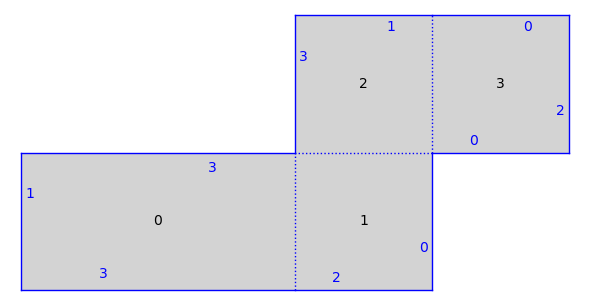

In [17]:
def dimple(x,y):

    def rectangle(a,b):
        return polygons(vertices = [(0,0),(a,0),(a,b),(0,b)])

    P1 = rectangle(x,y)
    Q1 = rectangle(1,y)
    R1 = rectangle(1,1)
    S1 = rectangle(y,1)
    
    s = Surface_list(QQ)

    s.add_polygon(P1)
    s.add_polygon(Q1)
    s.add_polygon(R1)
    s.add_polygon(S1)

    S = SimilaritySurface(s)

    s.set_edge_pairing(0,0,3,2)
    s.set_edge_pairing(0,1,1,3)
    s.set_edge_pairing(0,2,3,0)
    s.set_edge_pairing(0,3,1,1)
    s.set_edge_pairing(1,0,2,2)
    s.set_edge_pairing(1,2,2,0)
    s.set_edge_pairing(2,1,3,3)
    s.set_edge_pairing(2,3,3,1)

    gs = S.graphical_surface()

    gs.make_adjacent(1,2)
    gs.make_adjacent(2,1)      
    
    DS = S.minimal_cover(cover_type='dilation').copy(relabel=True)
    
    return DS, S, gs, s

DS, S, gs, s = dimple(2,1)
gs.plot()

In [4]:
# We first imagined the Dimple surface as a (1 by 1) square torus surface
# with an (x by x) square cut out, and replaced by a (1 by y) rectangle.
# 
# Then, we chose a presentation with the cut-out in the lower-left corner.
# The simplest presentation might be the following reparameterization:
# 
# Normalize Box 2 to be a unit square, and let x and y vary as the height and width of Box 0, respectively.
#
# The horizontal left-right sheers are generated by    [[1,z],    where  z = lcm( (x + 1)/y, y + 1).
#                                                       [0,1]]                   
# 
# The vertical up-down sheers are generated by         [[1, 0],   where z' = lcm(1/(y+1), xy/(y^2 + x)).
#                                                       [z',1]]
#                                                               
# This is because the surface decomposes into horizontal cylinders of moduli (x + 1)/y and y + 1,
# and it decomposes into vertical cylinders of moduli 1/(y+1) and xy/(y^2 + x).
# 
# These formulas match the results found,
# namely, the entries 6, 4, and 10 matrices for dimple(2,1), dimple(3,1), dimple(2,1).
# 
# Using FlatSurf, we are searching for Veech elements under certain simple parameters.
# Under the number of iterations we've tried so far, Flatsurf doesn't terminate,
# it just keeps finding more and more veech elements.

In [5]:
# DS, S, gs, s = dimple(2,1)
# IDC1 = IDC(DS, 200, veech = 1, show_current_sym = 0)
# show(IDC1.plot(model = 'UHP', figsize = 5)) #UHP or KM
# gs.plot()
# veech_matrices = list(IDC1.generators(normalize_det=1))
# show(veech_matrices)

In [18]:
all_veech_matrices = {}

In [19]:
def pprint(matrices):
    print(str([[[m[0][0],m[0][1]],[m[1][0],m[1][1]]] for m in matrices]))

In [21]:
DS, S, gs, s = dimple(2,1)

IDC1 = IDC(DS, 30000, veech = 1, show_current_sym = 0)
show(S.plot())
show(IDC1.plot(model = 'UHP', figsize = 10)) #UHP or KMf
show(list(IDC1.generators(normalize_det=1)))
pprint(IDC1.generators(normalize_det=1))

/private/var/tmp/sage-9.6-current/local/var/lib/sage/venv-python3.10.3/lib/python3.10/site-packages/ipykernel/iostream.py:214: RuntimeWarning: cypari2 leaked 11810415024 bytes on the PARI stack
  self._event_pipe.send(b'')


ERROR: inconsistent avma when removing Gen from PARI stack
Expected: 0x2bfe932a0
Actual:   0x2bff4c898
ERROR: removing wrong instance of Gen
Expected: [y^2 - 30, [2, 0], 120, 1, [[1, -5.47722557505166; 1, 5.47722557505166], [1, -5.47722557505166; 1, 5.47722557505166], [16, -88; 16, 88], [2, 0; 0, 60], [60, 0; 0, 2], [30, 0; 0, 1], [30, [0, 30; 1, 0]], [2, 3, 5]], [-5.47722557505166, 5.47722557505166], [1, y], [1, 0; 0, 1], [1, 0, 0, 30; 0, 1, 1, 0]]
Actual:   [y^2 - 30, [2, 0], 120, 1, [[1, -5.47722557505166; 1, 5.47722557505166], [1, -5.47722557505166; 1, 5.47722557505166], [16, -88; 16, 88], [2, 0; 0, 60], [60, 0; 0, 2], [30, 0; 0, 1], [30, [0, 30; 1, 0]], [2, 3, 5]], [-5.47722557505166, 5.47722557505166], [1, y], [1, 0; 0, 1], [1, 0, 0, 30; 0, 1, 1, 0]]
ERROR: inconsistent avma when removing Gen from PARI stack
Expected: 0x2bfe92290
Actual:   0x2bfe94b38
ERROR: removing wrong instance of Gen
Expected: <sage.rings.polynomial.real_roots.rr_gap object at 0x175e90e00>


SignalError: Segmentation fault

Exception ignored in: 'cypari2.stack.remove_from_pari_stack'
Traceback (most recent call last):
  File "cypari2/gen.pyx", line 280, in cypari2.gen.Gen.__str__
  File "cypari2/gen.pyx", line 245, in cypari2.gen.Gen.__repr__
cysignals.signals.SignalError: Segmentation fault


SignalError: Segmentation fault

In [9]:
# sage: cyl.holonomy()
# (3*a + 4, 2*a + 3)
# sage: cyl.edges()
# (2, 3, 3, 2, 4)
# cyl.polygons()
# b = cyl.boundary()

In [10]:
DS, S, gs, s = dimple(2,1)

In [11]:
A = matrix([[1, 0],
            [0, 1]])

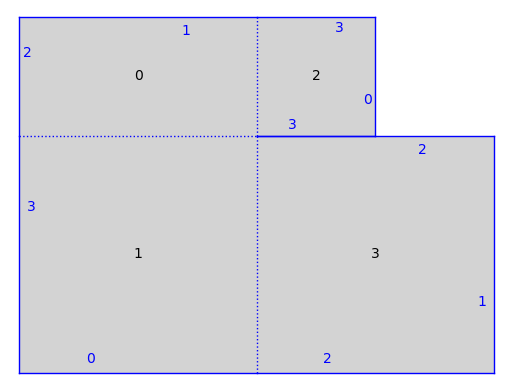

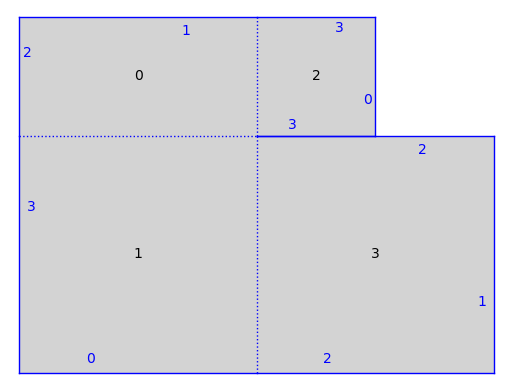

In [12]:
show(DS.plot())
show((A*DS).plot())

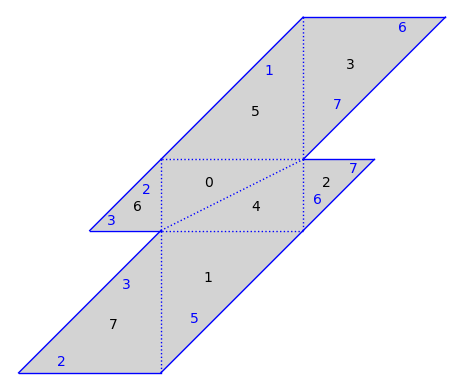

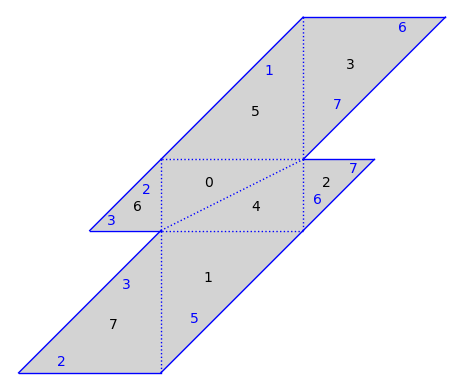

In [13]:
show((DS).delaunay_triangulation().plot())
show((A*DS).delaunay_triangulation().plot())

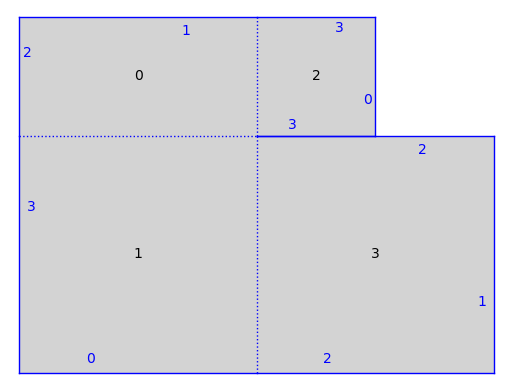

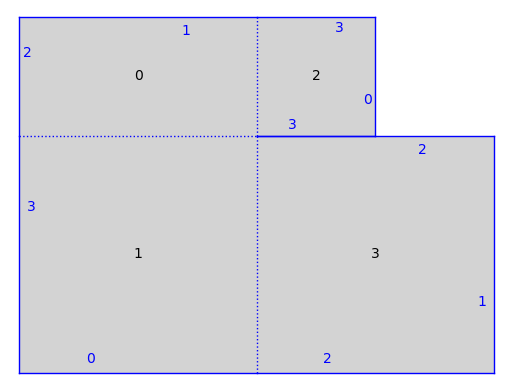

In [14]:
show(DS.delaunay_decomposition().plot())
show((A*DS).delaunay_decomposition().plot())

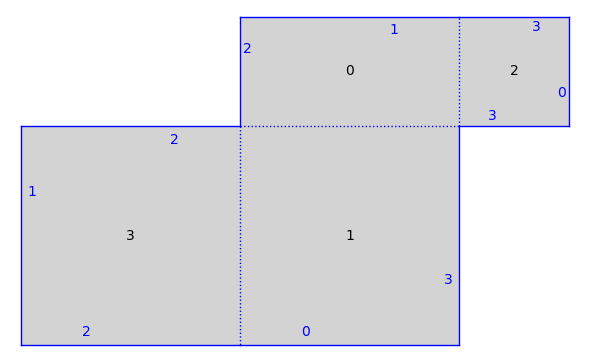

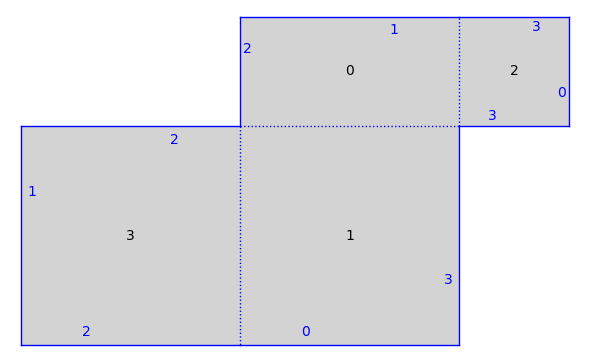

In [15]:
show(DS.canonicalize().plot())
show((A*DS).canonicalize().plot())

In [16]:
z = 11
y = 11/3
A = matrix([[1+z, -1*z/y],
            [z*y, 1-z]])
show(A)

print((A*DS).delaunay_triangulation() == DS.delaunay_triangulation())
print((A*DS).delaunay_decomposition() == DS.delaunay_decomposition())
print(DS.canonicalize() == (A*DS).canonicalize())

[   12    -3]
[121/3   -10]

False
False
False
